In [36]:
from ortools.sat.python import cp_model

# Parameters of drone and autonomous vehicle
drone_speed = 10  # velocity of drone (km/h)
vehicle_speed = 30  # velocity of autonomous vehicle (km/h)
drone_power = 50  # Drone power consumption (watts)
vehicle_efficiency = 0.2  # Fuel efficiency of autonomous vehicles (L/km)
fuel_eff = 1  # Assumed fuel consumption (unit: L/km)
distance_drone = [10, 20, 15]  # Distance flown by the drone (in kilometers)
distance_vehicle = [5, 10, 12]  # Distance travelled by car (in kilometers)

# Calculation time cost (unit: hours)
time_drone = [d / drone_speed for d in distance_drone]  # Drone flight time
time_vehicle = [d / vehicle_speed for d in distance_vehicle]  # Driving time

# Calculate energy consumption (in watt-hours)
energy_drone = [drone_power * t for t in time_drone]  # Energy consumption of drones
energy_vehicle = [d * vehicle_efficiency for d in distance_vehicle]  # Energy consumption of the car (assuming the unit is L)

# Create the model
model = cp_model.CpModel()

# Decision variables: 1 if task is assigned to drone, 0 if assigned to vehicle
x = [model.NewBoolVar(f"x_{i}") for i in range(len(distance_drone))]
y = [model.NewBoolVar(f"y_{j}") for j in range(len(distance_vehicle))]

# Total time and energy
total_time = sum(x[i] * time_drone[i] for i in range(len(distance_drone)))
total_energy = sum(x[i] * energy_drone[i] for i in range(len(distance_drone)))
total_vehicle_time = sum(y[j] * time_vehicle[j] for j in range(len(distance_vehicle)))
total_vehicle_energy = sum(y[j] * energy_vehicle[j] for j in range(len(distance_vehicle)))

# Objective: Minimize total cost (time + energy)
alpha = 0.5  # The weight coefficients of time and energy (can be adjusted)
beta = 0.5
model.Minimize(alpha * (total_time + total_vehicle_time) + beta * (total_energy + total_vehicle_energy))

# Constraints: Each task must be assigned to exactly one vehicle (drone or vehicle)
for i in range(len(distance_drone)):
    model.Add(x[i] + y[i] == 1)  # Ensure each task is either assigned to drone or vehicle

# Optional: Add other constraints like path limits if necessary
# For example, limit each vehicle or drone to only one task
for i in range(len(distance_drone)):
    model.Add(x[i] <= 1)

for j in range(len(distance_vehicle)):
    model.Add(y[j] <= 1)

# Solve the model using the CP-SAT solver
solver = cp_model.CpSolver()
status = solver.Solve(model)

# Print the results
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    print(f"Solution found with total cost: {solver.ObjectiveValue()}")
    for i in range(len(distance_drone)):
        print(f"Task {i} is assigned to drone: {solver.Value(x[i])}")
    for j in range(len(distance_vehicle)):
        print(f"Task {j} is assigned to vehicle: {solver.Value(y[j])}")
else:
    print("No solution found.")


Solution found with total cost: 3.1500000000000004
Task 0 is assigned to drone: 0
Task 1 is assigned to drone: 0
Task 2 is assigned to drone: 0
Task 0 is assigned to vehicle: 1
Task 1 is assigned to vehicle: 1
Task 2 is assigned to vehicle: 1


In [35]:
from ortools.sat.python import cp_model

# If the weight coefficients of time and energy are changed. 
alpha = 0.7  # weight of time
beta = 0.3   # weight of energy

# Parameters of drone and autonomous vehicle
drone_speed = 10  # velocity of drone (km/h)
vehicle_speed = 30  # velocity of autonomous vehicle (km/h)
drone_power = 50  # Drone power consumption (watts)
vehicle_efficiency = 0.2  # Fuel efficiency of autonomous vehicles (L/km)
fuel_eff = 1  # Assumed fuel consumption (unit: L/km)
distance_drone = [10, 20, 15]  # Distance flown by the drone (in kilometers)
distance_vehicle = [5, 10, 12]  # Distance travelled by car (in kilometers)

# Calculation time cost (unit: hours)
time_drone = [d / drone_speed for d in distance_drone]  # Drone flight time
time_vehicle = [d / vehicle_speed for d in distance_vehicle]  # Driving time

# Calculate energy consumption (in watt-hours)
energy_drone = [drone_power * t for t in time_drone]  # Energy consumption of drones
energy_vehicle = [d * vehicle_efficiency for d in distance_vehicle]  # Energy consumption of the car (assuming the unit is L)

# Create the model
model = cp_model.CpModel()

# Decision variables: 1 if task is assigned to drone, 0 if assigned to vehicle
x = [model.NewBoolVar(f"x_{i}") for i in range(len(distance_drone))]
y = [model.NewBoolVar(f"y_{j}") for j in range(len(distance_vehicle))]

# Total time and energy
total_time = sum(x[i] * time_drone[i] for i in range(len(distance_drone)))
total_energy = sum(x[i] * energy_drone[i] for i in range(len(distance_drone)))
total_vehicle_time = sum(y[j] * time_vehicle[j] for j in range(len(distance_vehicle)))
total_vehicle_energy = sum(y[j] * energy_vehicle[j] for j in range(len(distance_vehicle)))

# Objective: Minimize total cost (time + energy)
model.Minimize(alpha * (total_time + total_vehicle_time) + beta * (total_energy + total_vehicle_energy))

# Constraints: Each task must be assigned to exactly one vehicle (drone or vehicle)
for i in range(len(distance_drone)):
    model.Add(x[i] + y[i] == 1)  # Ensure each task is either assigned to drone or vehicle

# Optional: Add other constraints like path limits if necessary
# For example, limit each vehicle or drone to only one task
for i in range(len(distance_drone)):
    model.Add(x[i] <= 1)

for j in range(len(distance_vehicle)):
    model.Add(y[j] <= 1)

# Solve the model using the CP-SAT solver
solver = cp_model.CpSolver()
status = solver.Solve(model)

# Print the results
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    print(f"Solution found with total cost: {solver.ObjectiveValue()}")
    for i in range(len(distance_drone)):
        print(f"Task {i} is assigned to drone: {solver.Value(x[i])}")
    for j in range(len(distance_vehicle)):
        print(f"Task {j} is assigned to vehicle: {solver.Value(y[j])}")
else:
    print("No solution found.")


load D:\Users\王凯立\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\zlib1.dll...
load D:\Users\王凯立\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load D:\Users\王凯立\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load D:\Users\王凯立\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\re2.dll...
load D:\Users\王凯立\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load D:\Users\王凯立\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\highs.dll...
load D:\Users\王凯立\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\ortools.dll...
Solution found with total cost: 2.25
Task 0 is assigned to drone: 0
Task 1 is assigned to drone: 0
Task 2 is assigned to drone: 0
Task 0 is assigned to vehicle: 1
Task 1 is assigned to vehicle: 1
Task 2 is assigned to vehicle: 1


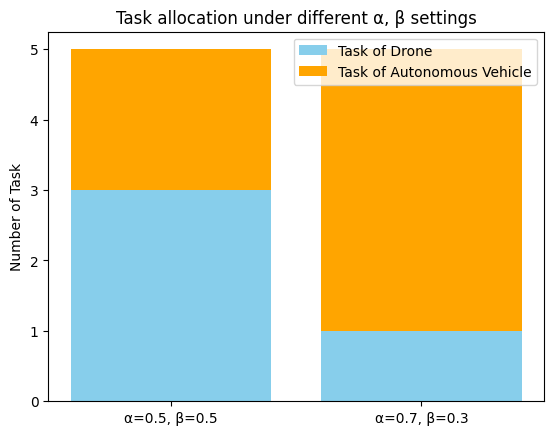

In [37]:
import matplotlib.pyplot as plt


labels = ['α=0.5, β=0.5', 'α=0.7, β=0.3']

# Task allocation under different weights
drone_tasks = [3, 1]  # Number of missions performed by drones
vehicle_tasks = [2, 4]  # Number of missions performed by the vehicle

x = range(len(labels))

plt.bar(x, drone_tasks, label="Task of Drone", color="skyblue")
plt.bar(x, vehicle_tasks, label="Task of Autonomous Vehicle", bottom=drone_tasks, color="orange")

plt.xticks(x, labels)
plt.ylabel("Number of Task")
plt.title("Task allocation under different α, β settings")
plt.legend()
plt.show()

In [38]:
# This bar chart shows the distribution of tasks under different α (time weight) and β (energy weight) settings. 
# When α=0.5, β=0.5, tasks are evenly distributed to drones (3 tasks) and vehicles (2 tasks).
# However, when α=0.7, β=0.3, the model is more inclined to optimize time, 
# resulting in more tasks (4 tasks) being assigned to vehicles and fewer tasks performed by drones (1 task).
# This shows that increasing the time weight will reduce the proportion of tasks for drones,
# indicating that drones are less competitive in time optimization.
# In the future, drone path planning can be further optimized or its performance can be improved to balance the scheduling strategy.

In [41]:
# This code requires increasing the number of tasks. If you want to increase the number of tasks, this means expanding the task set.

from ortools.sat.python import cp_model
import numpy as np

# Coefficients for the time and energy costs
alpha = 0.5
beta = 0.5

# Number of tasks (can be randomly changed between 1 and 10)
num_tasks = 6

# Drone and vehicle parameters
drone_speed = 10
vehicle_speed = 30
drone_power = 50
vehicle_efficiency = 0.2

# Randomly generate task distances for drones and vehicles
np.random.seed(42)
distance_drone = np.random.randint(5, 20, size=num_tasks)
distance_vehicle = np.random.randint(5, 20, size=num_tasks)

# Calculate time and energy consumption for each drone and vehicle based on their speeds and powers
time_drone = [d / drone_speed for d in distance_drone]
time_vehicle = [d / vehicle_speed for d in distance_vehicle]
energy_drone = [drone_power * t for t in time_drone]
energy_vehicle = [d * vehicle_efficiency for d in distance_vehicle]

# Create the CP-SAT model
model = cp_model.CpModel()

# Decision variables: 1 if task is assigned to drone, 0 if assigned to vehicle
x = [model.NewBoolVar(f"x_{i}") for i in range(num_tasks)]
y = [model.NewBoolVar(f"y_{i}") for i in range(num_tasks)]

# Objective: Minimize the joint time-energy cost
total_time = sum(x[i] * time_drone[i] for i in range(num_tasks)) + sum(y[i] * time_vehicle[i] for i in range(num_tasks))
total_energy = sum(x[i] * energy_drone[i] for i in range(num_tasks)) + sum(y[i] * energy_vehicle[i] for i in range(num_tasks))

# Objective function
model.Minimize(alpha * total_time + beta * total_energy)

# Constraints
# Each task must be assigned to either a drone or a vehicle
for i in range(num_tasks):
    model.Add(x[i] + y[i] == 1)  # Ensure each task is assigned to either a drone or a vehicle

# Optional: Limit each path to at most one task (if applicable to scheduling scenarios)
for i in range(num_tasks):
    model.Add(x[i] <= 1)
    model.Add(y[i] <= 1)

# Solve the model using CP-SAT solver
solver = cp_model.CpSolver()
status = solver.Solve(model)

# Print the results
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    print(f"Solution found with total cost: {solver.ObjectiveValue()}")
    for i in range(num_tasks):
        print(f"Task {i} is performed by drone: {solver.Value(x[i])}")
        print(f"Task {i} is performed by vehicle: {solver.Value(y[i])}")
else:
    print("No solution found.")

Solution found with total cost: 8.05
Task 0 is performed by drone: 0
Task 0 is performed by vehicle: 1
Task 1 is performed by drone: 0
Task 1 is performed by vehicle: 1
Task 2 is performed by drone: 0
Task 2 is performed by vehicle: 1
Task 3 is performed by drone: 0
Task 3 is performed by vehicle: 1
Task 4 is performed by drone: 0
Task 4 is performed by vehicle: 1
Task 5 is performed by drone: 0
Task 5 is performed by vehicle: 1


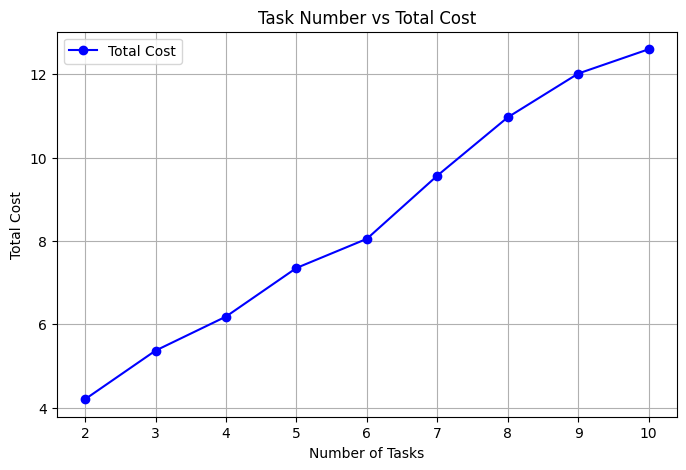

In [43]:
# This code demonstrate the line graph of total cost as a function of number of tasks.

from ortools.sat.python import cp_model
import numpy as np
import matplotlib.pyplot as plt

# Coefficients for the time and energy costs
alpha = 0.5
beta = 0.5

# Drone and vehicle parameters
drone_speed = 10
vehicle_speed = 30
drone_power = 50
vehicle_efficiency = 0.2

# Range of number of tasks (from 2 to 10 tasks)
task_counts = list(range(2, 11))
total_costs = []  # Record the total cost at different task numbers

# Loop through different task counts
for num_tasks in task_counts:
    np.random.seed(42)  # Keep the random numbers consistent to ensure the same data each time you run it
    distance_drone = np.random.randint(5, 20, size=num_tasks)  # Mission drone distance
    distance_vehicle = np.random.randint(5, 20, size=num_tasks)  # Vehicle distance for mission

    # Computation time & energy consumption
    time_drone = [d / drone_speed for d in distance_drone]
    time_vehicle = [d / vehicle_speed for d in distance_vehicle]
    energy_drone = [drone_power * t for t in time_drone]
    energy_vehicle = [d * vehicle_efficiency for d in distance_vehicle]

    # Create the CP-SAT model
    model = cp_model.CpModel()

    # Decision variables: 1 if task is assigned to drone, 0 if assigned to vehicle
    x = [model.NewBoolVar(f"x_{i}") for i in range(num_tasks)]
    y = [model.NewBoolVar(f"y_{i}") for i in range(num_tasks)]

    # Objective: Minimize the joint time-energy cost
    total_time = sum(x[i] * time_drone[i] for i in range(num_tasks)) + sum(y[i] * time_vehicle[i] for i in range(num_tasks))
    total_energy = sum(x[i] * energy_drone[i] for i in range(num_tasks)) + sum(y[i] * energy_vehicle[i] for i in range(num_tasks))

    # Objective function
    model.Minimize(alpha * total_time + beta * total_energy)

    # Constraints
    # Each task must be assigned to either a drone or a vehicle
    for i in range(num_tasks):
        model.Add(x[i] + y[i] == 1)  # Ensure each task is assigned to either a drone or a vehicle

    # Optional: Limit each path to at most one task (if applicable to scheduling scenarios)
    for i in range(num_tasks):
        model.Add(x[i] <= 1)
        model.Add(y[i] <= 1)

    # Solve the model using CP-SAT solver
    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    # Record total cost if a solution is found
    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        total_costs.append(solver.ObjectiveValue())
    else:
        total_costs.append(float('inf'))  # In case no feasible solution is found

# Draw a line chart
plt.figure(figsize=(8, 5))
plt.plot(task_counts, total_costs, marker='o', linestyle='-', color='b', label="Total Cost")
plt.xlabel("Number of Tasks")
plt.ylabel("Total Cost")
plt.title("Task Number vs Total Cost")
plt.legend()
plt.grid(True)
plt.show()



In [16]:
# This figure shows the relationship between the number of tasks and the total cost. 
# As the number of tasks increases, the total cost increases because more tasks need to be assigned to drones or autonomous vehicles, 
# resulting in increased time and energy consumption. However, the growth rate is not linear and may be affected by optimization strategies, 
# path selection, and resource scheduling. 
# This analysis helps to understand the impact of task allocation on logistics costs and provide optimization basis for practical applications.